In [ ]:
!pip install yfinance
!pip install git+https://github.com/dcajasn/Riskfolio-Lib.git
!pip install PyPortfolioOpt

#Faut changer notre version de numpy et pandas, pour l'avant dernière
!pip install Numpy==1.23.5
!pip install pandas==1.3.2



In [1]:
run data.py

[*********************100%%**********************]  11 of 11 completed


In [2]:
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
ticker_list=['ESGU', 'EAGG', 'ESGE', 'ESML', 'SUSB', 'ESGD', 'SHY', 'SUSA' , 'GOVT', 'MBB', 'SUSC']

# DOES NOT INCLUDE ALL THE TICKERS (missing GOVT and SUSA)
ticker_list_sub=['ESGU', 'EAGG', 'ESGE', 'ESML', 'SUSB', 'ESGD', 'SHY', 'MBB', 'SUSC']

etf_monthly_rets = getData(ticker_list_sub)


[*********************100%%**********************]  9 of 9 completed


In [3]:
# Importing ETF benchmark indexes
df_index = pd.DataFrame()
for i in ticker_list_sub:
    csv_file_path = (f'data/{i}_index.csv')
# Example usage
    stored_serie = import_csv_with_date_index(csv_file_path)
    df_index = pd.concat([df_index, stored_serie], axis=1)

df_index.columns = ticker_list_sub
df_index_rets = df_index.pct_change()   
df_index_rets = df_index_rets.iloc[1:,:]


# Generate values for nas
# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
# Fit the imputer on the data and transform the DataFrame
df_imputed_index = pd.DataFrame(imputer.fit_transform(df_index_rets), columns=df_index_rets.columns, index=df_index_rets.index)


count    283.000000
mean       0.007107
std        0.030191
min       -0.072736
25%       -0.012475
50%        0.012037
75%        0.026975
max        0.110611
Name: ESGU, dtype: float64
Average spread of the index for the etf ESGU: 0.18334701034632206
Maximum spread of the index for the etf ESGU: 0.18334701034632206
Skewness of the index for the etf ESGU: -0.26689548329820695 
Kurtosis of the index for the etf ESGU: 0.27292124010101615 

count    283.000000
mean       0.003277
std        0.010287
min       -0.043401
25%       -0.000715
50%        0.002652
75%        0.010402
max        0.036925
Name: EAGG, dtype: float64
Average spread of the index for the etf EAGG: 0.08032620818975811
Maximum spread of the index for the etf EAGG: 0.08032620818975811
Skewness of the index for the etf EAGG: -0.6366115054784772 
Kurtosis of the index for the etf EAGG: 2.448509402158723 

count    283.000000
mean       0.002902
std        0.032807
min       -0.108789
25%       -0.015046
50%        0.0013

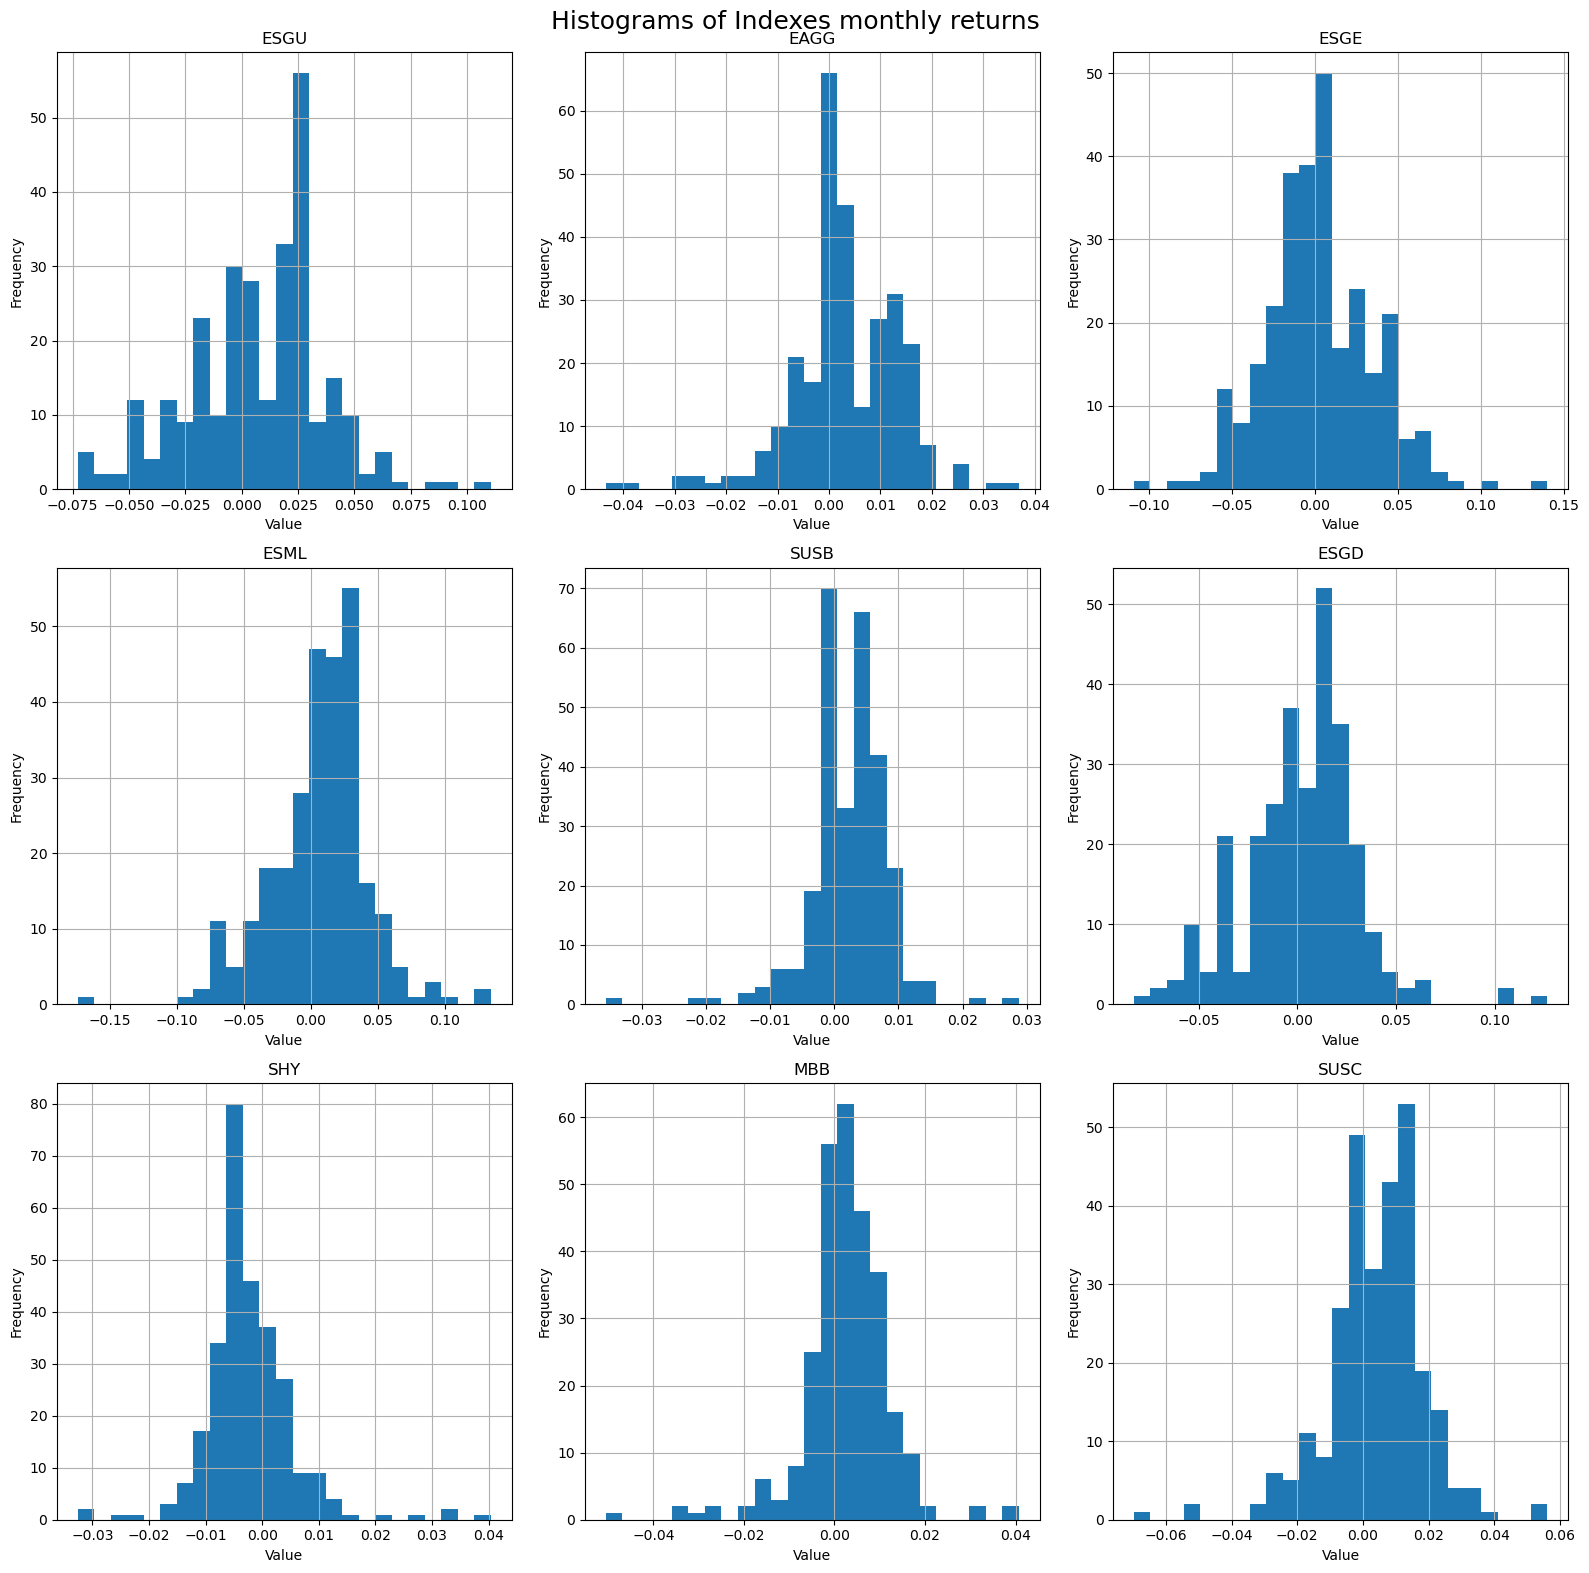

In [21]:
# Grid of histograms of the Indexes monthly returns 

# Get the list of all column names
columns = df_imputed_index.columns

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Histograms of Indexes monthly returns", fontsize=18)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through the columns and plot histograms
for i, column in enumerate(columns):
    if i >= num_rows * num_cols:
        break  # Exit the loop if you exceed the number of subplots
    
    ax = axs[i]
    df_imputed_index[column].hist(ax=ax, bins=25)  # You can adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    print(df_imputed_index[column].describe())
    print(f'Average spread of the index for the etf {column}: {np.mean(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Maximum spread of the index for the etf {column}: {np.max(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Skewness of the index for the etf {column}: {np.mean(skew(df_imputed_index[column][:], nan_policy="omit"))} ')
    print(f'Kurtosis of the index for the etf {column}: {np.mean(kurtosis(df_imputed_index[column][:], nan_policy="omit"))} ')
    print("", sep='\n')


# Hide any empty subplots if there are more subplots than columns
for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


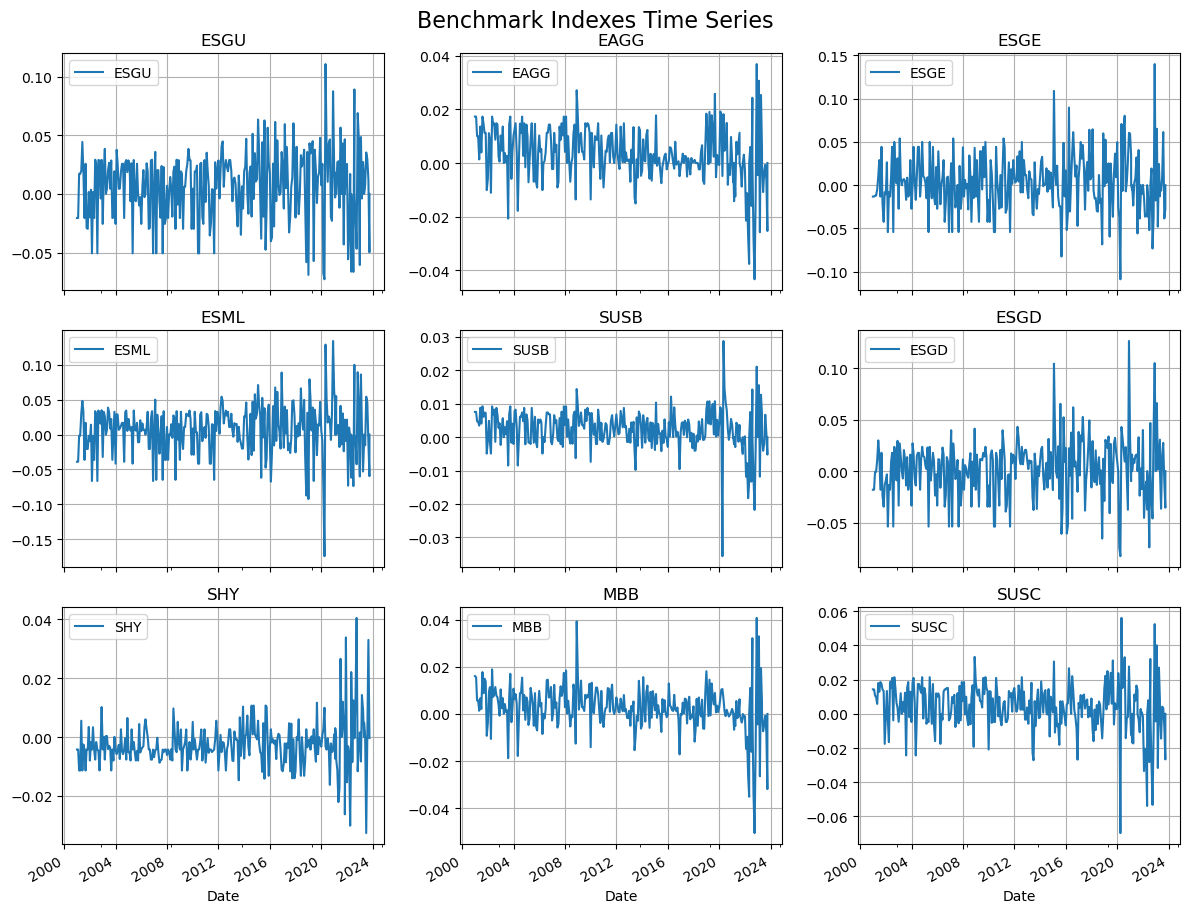

In [5]:
#====================================================================================
# Grid of time seiries of the Indexes monthly returns 

# Plotting in a 3 by 4 grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(df_imputed_index.columns):
    df_imputed_index[column].plot(ax=axes[i], legend=True, grid=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')  # Set x-axis label on each subplot
    ax.set_ylabel('Return')

# Adjust layout
plt.tight_layout()
fig.suptitle('Benchmark Indexes Time Series', fontsize=16).set_y(1.01)

# Show the plot
plt.show()

In [6]:
df_imputed_index

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,MBB,SUSC
Date,,,,,,,,,
2000-12-29,-0.020554,0.017336,-0.013169,-0.038916,0.007573,-0.018144,-0.004242,0.016101,0.014315
2001-01-31,-0.020554,0.017336,-0.013169,-0.038916,0.007573,-0.018144,-0.004242,0.015569,0.014315
2001-02-28,0.017133,0.010018,-0.012107,-0.001508,0.004769,-0.000799,-0.011362,0.005726,0.010691
2001-03-30,0.017133,0.010018,-0.012107,-0.001508,0.004581,-0.000799,-0.011362,0.005804,0.009856
2001-04-30,0.019556,0.001342,-0.005001,0.029985,0.003470,0.010435,0.005530,0.001388,0.005832
...,...,...,...,...,...,...,...,...,...
2023-06-30,0.035321,-0.003571,0.008918,0.054402,-0.002137,0.015630,-0.032587,-0.004266,0.004196
2023-07-31,0.029793,-0.000672,0.061386,0.046461,0.006721,0.027444,-0.001350,-0.000746,0.003532
2023-08-31,0.012264,-0.006373,-0.038494,-0.011465,0.001223,-0.010876,0.032940,-0.008227,-0.007614


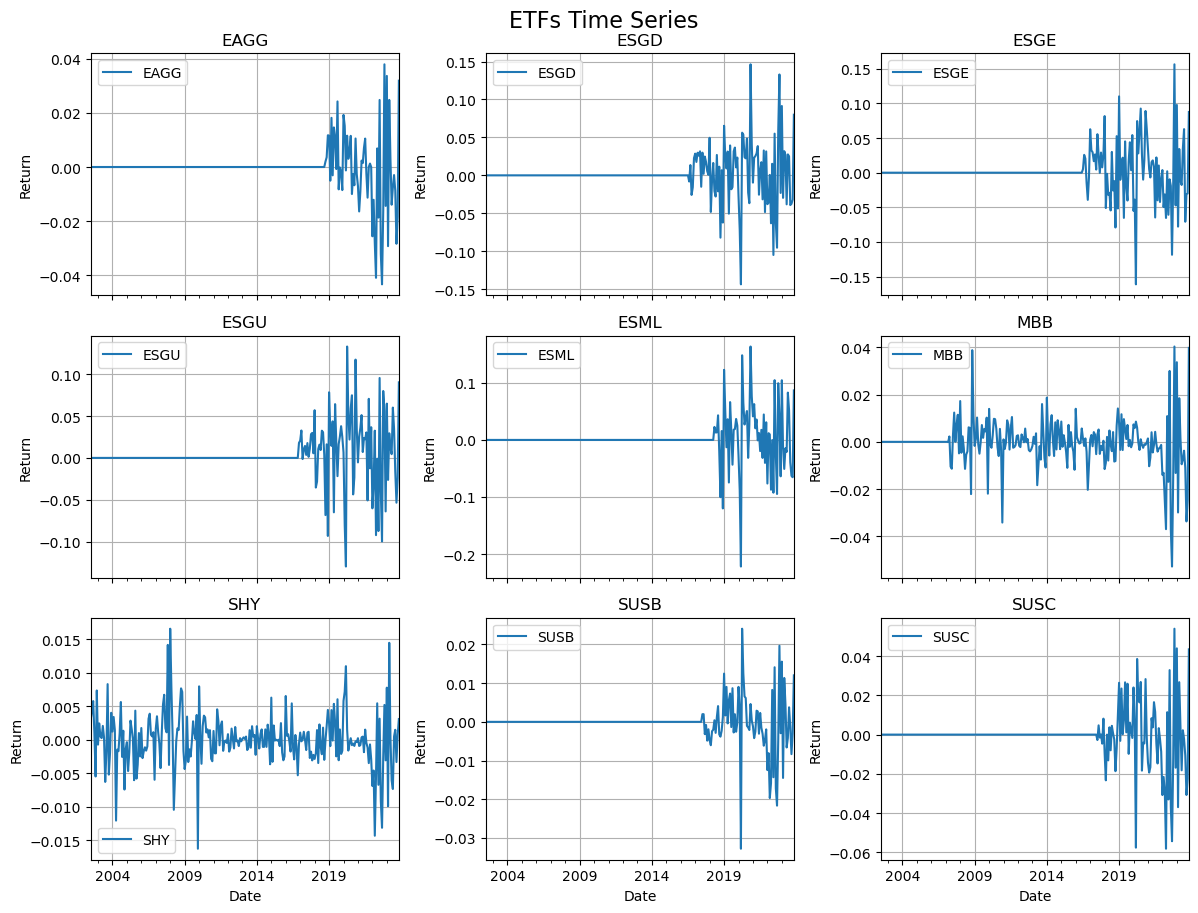

In [7]:
# Grid of time seiries of the ETFs monthly returns 

# Determine the number of subplots based on the number of columns
num_subplots = len(etf_monthly_rets.columns)

# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(num_subplots / 3))
num_cols = min(num_subplots, 3)

# Plotting in a dynamic grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 9), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(etf_monthly_rets.columns):
    etf_monthly_rets[column].plot(ax=axes[i], legend=True, grid=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Return')

# Adjust layout
plt.tight_layout()
fig.suptitle('ETFs Time Series', fontsize=16).set_y(1.01)

In [8]:
etf_monthly_rets

,EAGG,ESGD,ESGE,ESGU,ESML,MBB,SHY,SUSB,SUSC
Date,,,,,,,,,
2002-07-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003086,0.000000,0.000000
2002-08-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004307,0.000000,0.000000
2002-09-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005759,0.000000,0.000000
2002-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000975,0.000000,0.000000
2002-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005477,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2023-07-31,-0.002968,0.025093,0.062915,0.034886,0.052083,-0.003753,0.000493,0.003764,-0.002199
2023-08-31,-0.008718,-0.039192,-0.070791,-0.016359,-0.039069,-0.010977,0.001479,-0.001250,-0.010577
2023-09-30,-0.028314,-0.037589,-0.030730,-0.053422,-0.062935,-0.033732,-0.003323,-0.008344,-0.030735


#### Tracking error between ETF's and associated benchmark Index 

In [9]:
# Select common columns
common_columns = set(etf_monthly_rets.columns) & set(df_imputed_index.columns)

# Calculate the tracking error for each common column
tracking_errors = {}
for column in common_columns:
    # Filter out rows with a value of 0 in both DataFrames
    valid_rows = (etf_monthly_rets[column] != 0) | (df_imputed_index[column] != 0)
    
    # Calculate the tracking error for valid rows
    diff = etf_monthly_rets[column][valid_rows] - df_imputed_index[column][valid_rows]
    tracking_error = np.std(diff)
    tracking_errors[column] = tracking_error

# Display the tracking errors
for column, tracking_error in tracking_errors.items():
    print(f'Tracking Error for {column}: {tracking_error}')

Tracking Error for SUSB: 0.004041105368112377
Tracking Error for ESML: 0.030147720903850858
Tracking Error for SHY: 0.009970923282406357
Tracking Error for MBB: 0.006168187565557076
Tracking Error for ESGD: 0.024415869461130328
Tracking Error for SUSC: 0.010740404888851507
Tracking Error for ESGU: 0.0268830501736736
Tracking Error for ESGE: 0.027219572896831162
Tracking Error for EAGG: 0.007975757871260779


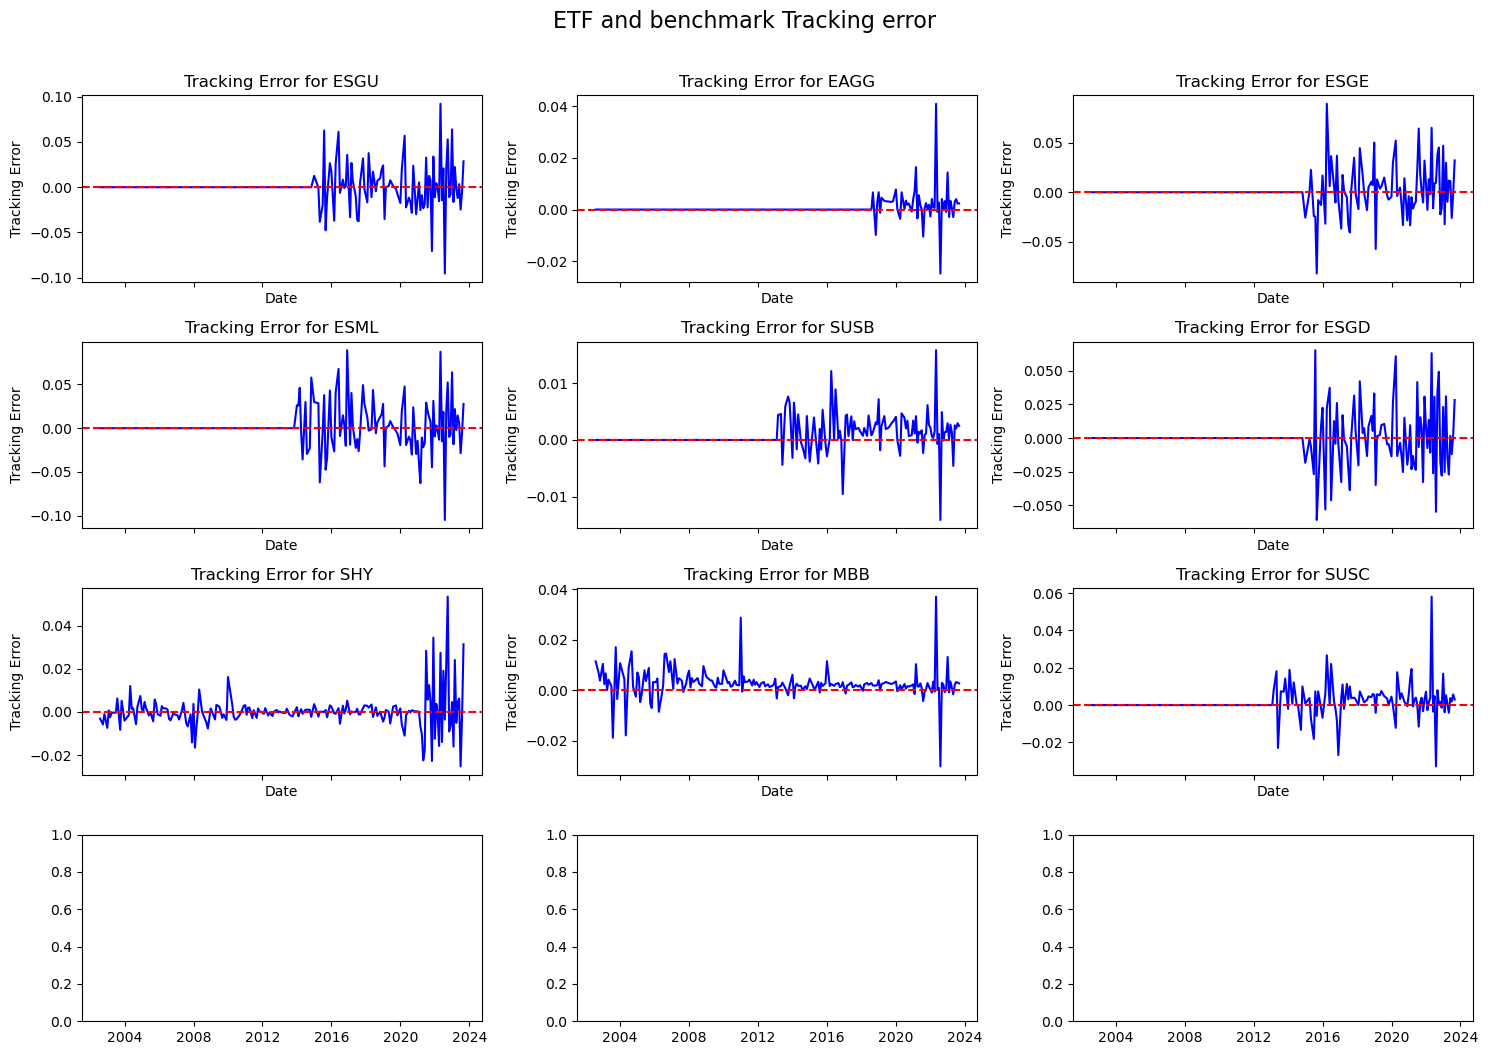

In [10]:
# Time serie of the tracking error of each etf and its index 
df_index_rets = df_index_rets[etf_monthly_rets.head(1).index[0]:]
df_index_rets = df_index_rets.iloc[:-1]
df_index_rets = df_index_rets.groupby(df_index_rets.index).sum()

# Remove the unnecessary line below
# etf_monthly_rets.index = etf_monthly_rets.index.to_period('M')
etf_monthly_rets = etf_monthly_rets.loc[:df_index_rets.tail(1).index[0]]

common_index = df_index_rets.index.intersection(etf_monthly_rets.index)
common_index = common_index[
    common_index.isin(df_index_rets.index) &
    common_index.isin(etf_monthly_rets.index) &
    (pd.notna(df_index_rets.loc[common_index]).any(axis=1)) &
    (etf_monthly_rets.loc[common_index] != 0).any(axis=1)
]

# Select data for common non-zero and non-NaN rows
df1_common = df_index_rets.loc[common_index]
df2_common = etf_monthly_rets.loc[common_index]

# Initialize an empty DataFrame to store tracking errors
tracking_errors_df = pd.DataFrame(index=common_index, columns=df_index_rets.columns)

# Iterate over each column in the DataFrames
for column in tracking_errors_df.columns:
    # Identify non-zero and non-NaN values for the current column
    valid_indices = (df1_common[column] != 0) & pd.notna(df1_common[column]) & \
                    (df2_common[column] != 0) & pd.notna(df2_common[column])
    for rows in valid_indices.index:
    
    # Compute tracking error for the current column only for valid indices
        tracking_error = (df1_common.loc[rows, column] - df2_common.loc[rows, column])
    
        # Fill in the tracking_errors_df DataFrame
        tracking_errors_df.loc[rows, column] = tracking_error

# Convert non-numeric values to NaN
tracking_errors_df_numeric = tracking_errors_df.apply(pd.to_numeric, errors='coerce')

num_rows = 4
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

for i, ticker in enumerate(tracking_errors_df_numeric.columns):
    # Plot the actual and predicted time series
    axes[i].plot(tracking_errors_df_numeric.index, tracking_errors_df_numeric[ticker], label=f'Tracking error of index {ticker}', color='blue')
    axes[i].set_title(f'Tracking Error for {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Tracking Error')
    axes[i].axhline(y=0, color='red', linestyle='--', label='Zero Line')

# Adjust layout
plt.tight_layout()
fig.suptitle('ETF and benchmark Tracking error', fontsize=16).set_y(1.05)
plt.show()

C:\Users\Samuel\anaconda3\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


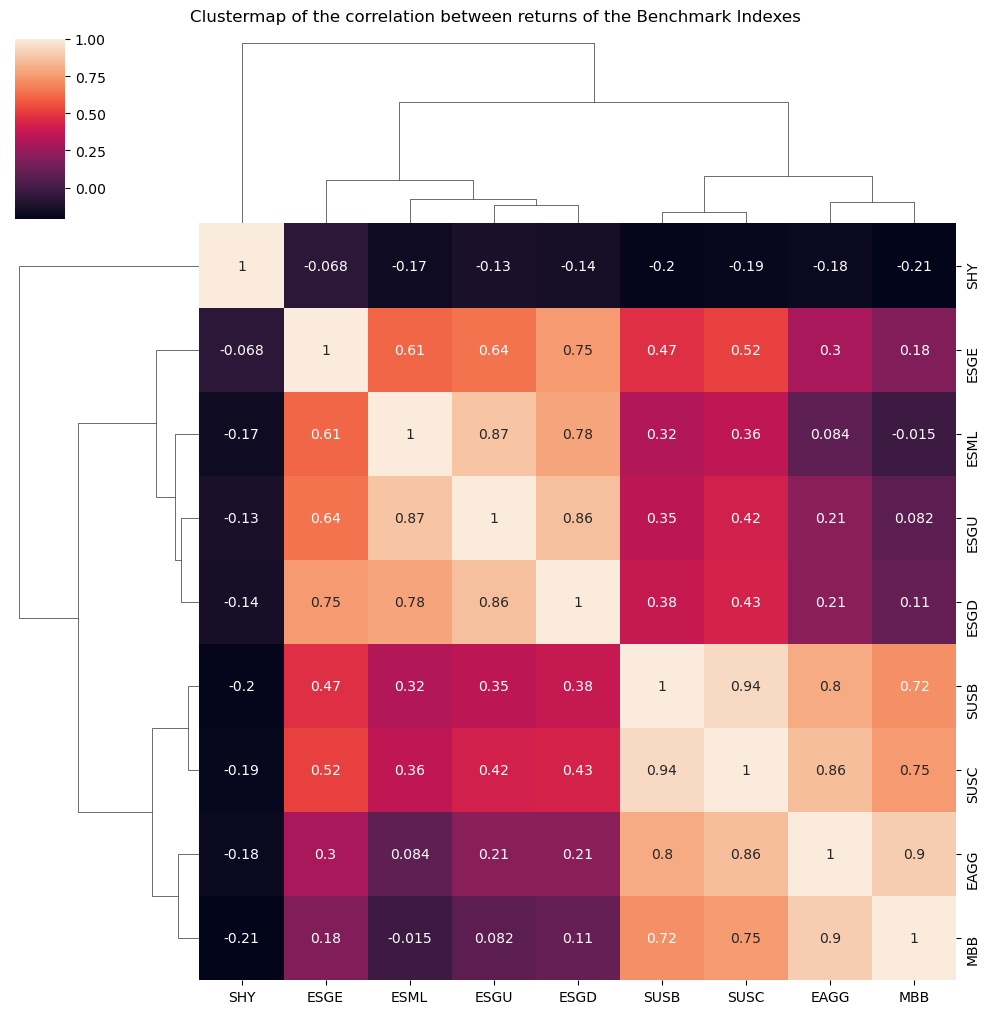

In [11]:
# Clustermap of correlation of benchmark indexes returns
# Compute corr matrix
imputed_index_corr = pd.DataFrame(df_imputed_index).corr()

sns.clustermap(imputed_index_corr, annot=True, square=True)
plt.suptitle('Clustermap of the correlation between returns of the Benchmark Indexes').set_y(1.01)

plt.show();


In [12]:
#----------------------------------------- Importation des donnees from FRED Website ------------------------------------------------
# Import Features via FRED API 

# Features lists
features_list = ['BAMLCC0A0CMTRIV', 'BAMLC0A4CBBB', 'BAMLC0A3CA', 'HQMCB10YR', 'FEDFUNDS', 'T10Y2Y', 'TB3SMFFM',
                 'T5YFF', 'T1YFF', 'DLTIIT', 'NASDAQCOM', 'WILL5000PR', 'WILLLRGCAP', 'WILLSMLCAP', 'WILLLRGCAPGR', 
                 'WILLLRGCAPVAL', 'WILLMIDCAP', 'MSPUS', 'CCSA', 'BOPGSTB', 'VIXCLS', 'USSLIND', 'USALOLITONOSTSAM', 'UNRATE', 
                 'STICKCPIM157SFRBATL', 'EMVMACROBUS', 'MORTGAGE30US',  'WILLRESIPR']


df_features = pd.DataFrame(columns=features_list )

for i in features_list:
    try:
        data= import_fred(i)
        df_features[i] = data.resample('M').last()
    except Exception as e:
        print(f"Error fetching data for {i}: {e}")
        
# Create a KNNImputer instance
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
# Fit the imputer on the data and transform the DataFrame
df_features = pd.DataFrame(imputer.fit_transform(df_features), columns=df_features.columns, index=df_features.index)
        

#### Missing features 

* equity indexes 

## Machine learning methods to predict next month return
* Random Forest 
* Regression Tree

## Random Forest

In [13]:
# Machine Learning 
len(df_features)
len(df_imputed_index)

df_features = df_features.loc[df_imputed_index.head(1).index[0]:df_imputed_index.tail(1).index[0]]

merged_df = pd.merge(df_features, df_imputed_index, left_index=True, right_index=True)

# Specify columns to lag
columns_to_lag = features_list

# Number of periods to lag
lag_periods = 1

# Lag the specified columns
merged_df[columns_to_lag] = merged_df[columns_to_lag].shift(lag_periods)
merged_df.dropna(inplace=True, axis=0)

x = merged_df[features_list]
y = merged_df[ticker_list_sub] 

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

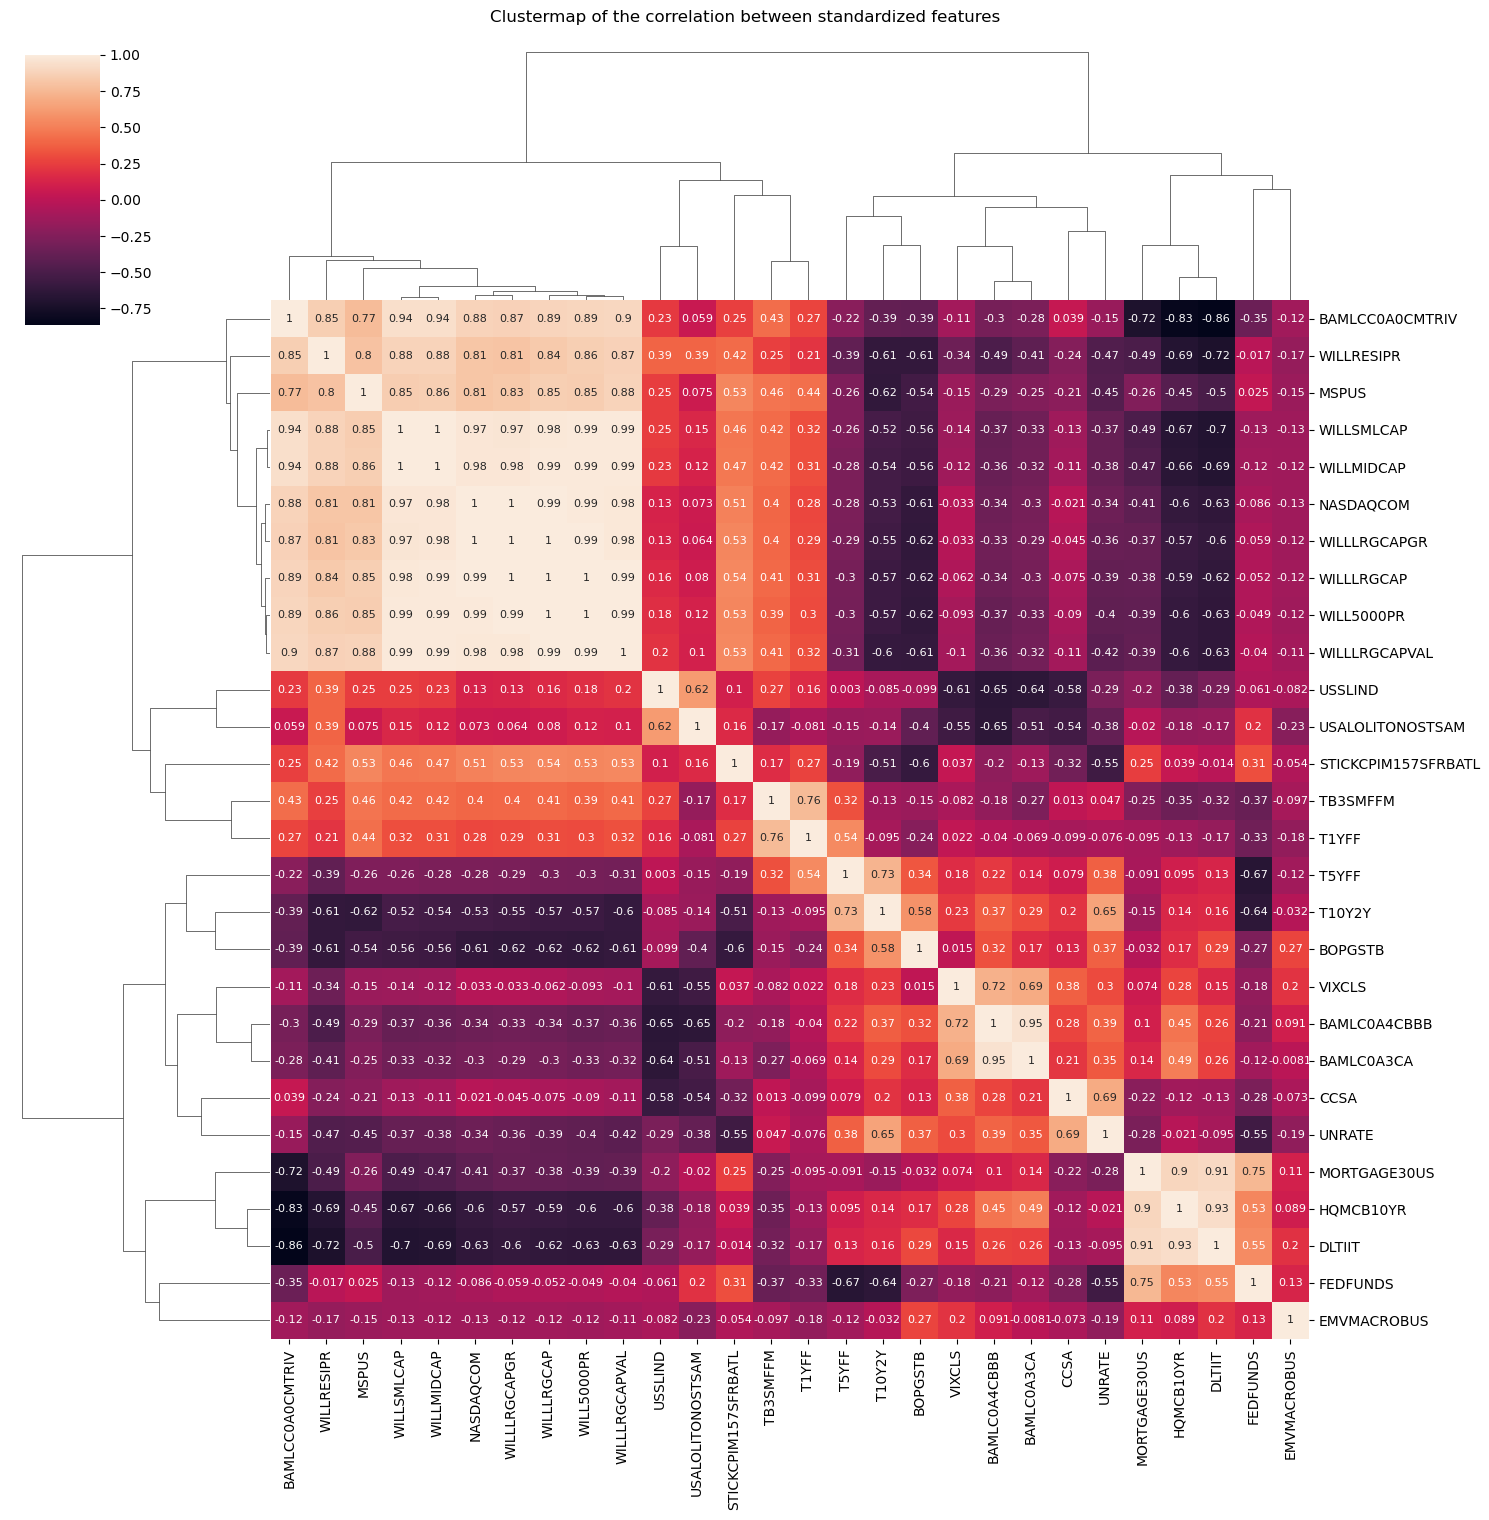

In [15]:
# Assuming x_scaled_corr is your correlation matrix
x_scaled_corr = pd.DataFrame(x_scaled).corr()
x_scaled_corr.index = features_list
x_scaled_corr.columns = features_list

# Create a clustermap
clustermap = sns.clustermap(x_scaled_corr, annot=True, figsize=(15, 15),  annot_kws={"fontsize": 8})
# Add a title to the clustermap
plt.suptitle('Clustermap of the correlation between standardized features').set_y(1.01)

# Show the plot
plt.show()

We can notice some strong correlations levels are observable among the historical features values. This makes sense since we do expect indeed that interest rate measure move together. This is also true for total market equity indexes used such as S&P500, Wilshire 1000, Wildshire total market, etc.  The following table describe the feature associated with the tick presented in the clustermap. 

**Bonds**
 
- **BAMLCC0A0CMTRIV**: ICE BofA US Corporate Index Total Return Index Value <br>
- **BAMLC0A4CBBB**: ICE BofA BBB US Corporate Index Option-Adjusted Spread  <br>
- **BAMLC0A3CA**: ICE BofA Single-A US Corporate Index Option-Adjusted Spread  <br>
- **HQMCB10YR**: 10-Year High Quality Market (HQM) Corporate Bond Spot Rate <br>
- **FEDFUNDS**: Federal Funds Effective Rate <br>
- **T10Y2Y**: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity <br>
- **TB3SMFFM**: 3-Month Treasury Bill Minus Federal Funds Rate <br>
- **T5YFF**: 5-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **T1YFF**: 1-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **DLTIIT**: Treasury Long-Term Average (Over 10 Years), Inflation-Indexed <br>


**Equity Indexes**
- **NASDAQCOM**: NASDAQ Composite Index<br>
- **WILL5000PR**: Wilshire 5000 Price Index<br>
- **WILLLRGCAP**: Wilshire US Large-Cap Total Market<br>
- **WILLSMLCAP**: Wilshire US Small-Cap Total Market Index<br>
- **WILLLRGCAPGR**: Wilshire US Large-Cap Growth Total Market Index<br>
- **WILLLRGCAPVAL**: Wilshire US Large-Cap Value Total Market Index<br>
- **WILLMIDCAP**: Wilshire US Mid-Cap Total Market Index<br>

[I want to add a few more equity indexes] -> From Bloomberg


**Other**
- **MSPUS**: Median Sales Price of Houses Sold for the United States <br>
- **CCSA**: Continued Claims (Insured Unemployment) <br>
- **BOPGSTB**: Trade Balance: Goods and Services, Balance of Payments Basis<br>
- **VIXCLS**: CBOE Volatility Index: VIX<br>
- **USSLIND**: Leading Index for the United States<br>
- **USALOLITONOSTSAM**: Leading Indicators OECD: Leading Indicators: Composite Leading Indicator: Normalised for United States<br>
- **UNRATE**: Unemployment Rate<br>
- **STICKCPIM157SFRBATL**: Sticky Price Consumer Price Index less Food and Energy       <br>
- **EMVMACROBUS**: Equity Market Volatility Tracker: Macroeconomic News and Outlook: Business Investment And Sentiment<br>
- **MORTGAGE30US**: 30-Year Fixed Rate Mortgage Average in the United States<br>
- **WILLRESIPR**: Wilshire US Real Estate Securities Price Index (Wilshire US RESI)<br>



## Random Forest 

Average Mean Absolute Error for ESGU across 5-fold cross-validation: 0.026919993967234313
Average Mean Absolute Error for EAGG across 5-fold cross-validation: 0.006754321034348455
Average Mean Absolute Error for ESGE across 5-fold cross-validation: 0.027738616854192388
Average Mean Absolute Error for ESML across 5-fold cross-validation: 0.03214986146922897
Average Mean Absolute Error for SUSB across 5-fold cross-validation: 0.004526469718248674
Average Mean Absolute Error for ESGD across 5-fold cross-validation: 0.02348626131829403
Average Mean Absolute Error for SHY across 5-fold cross-validation: 0.006128217776173356
Average Mean Absolute Error for MBB across 5-fold cross-validation: 0.006178892118348739
Average Mean Absolute Error for SUSC across 5-fold cross-validation: 0.011005875009446603


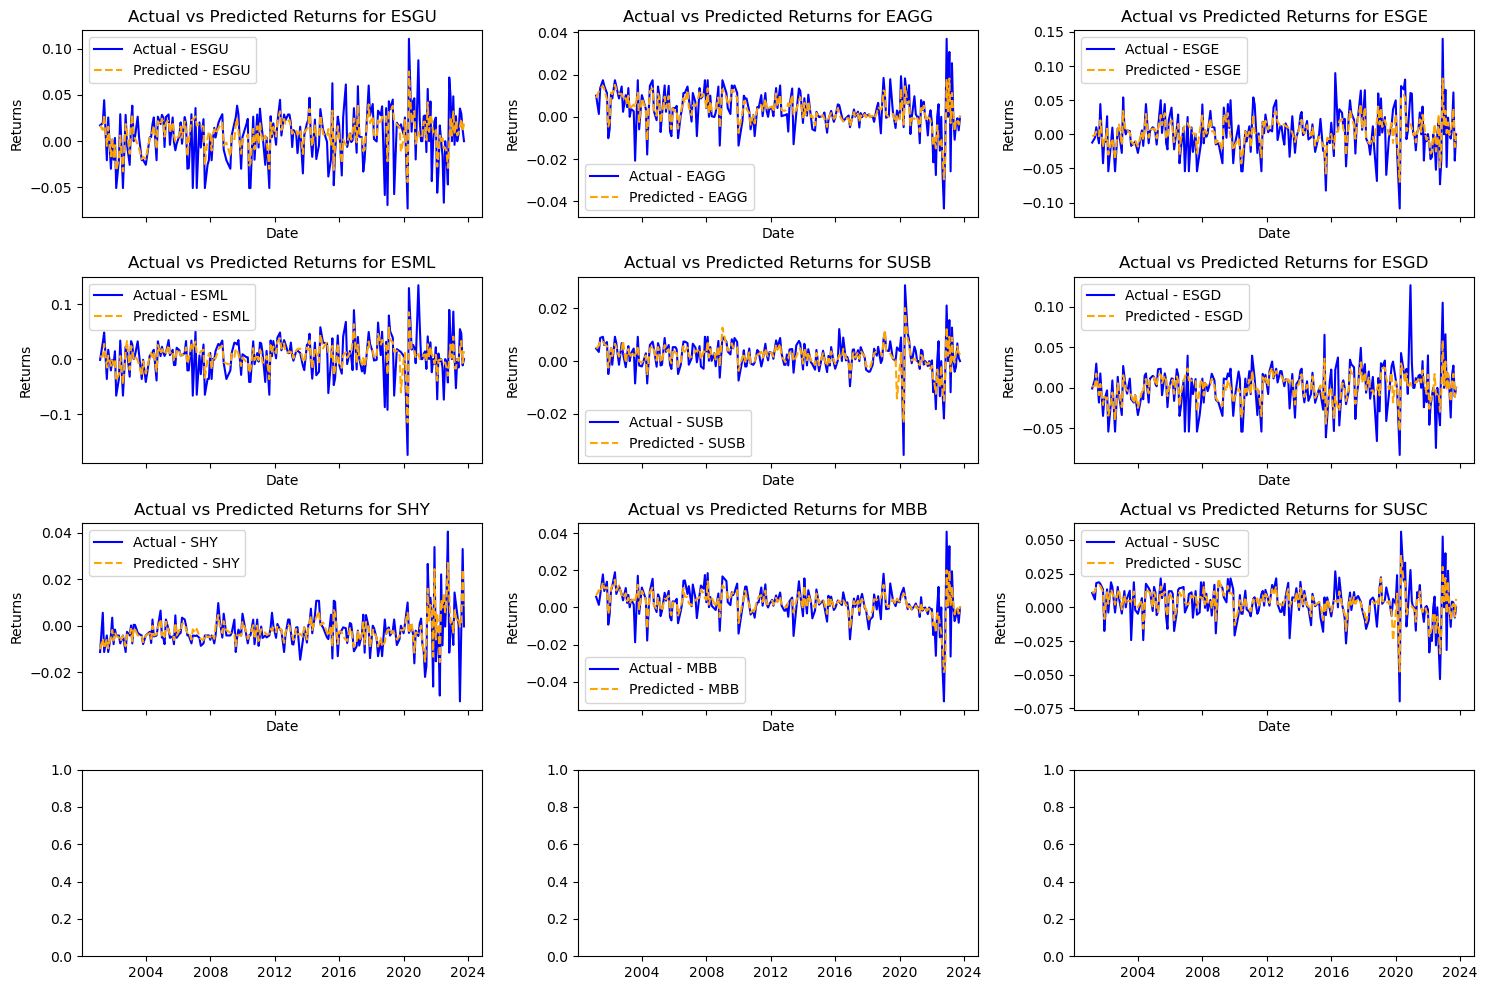


Predicted Returns DataFrame:
                ESGU      EAGG      ESGE      ESML      SUSB      ESGD  \
2001-02-28  0.016852  0.008945 -0.002733  0.004553  0.004827  0.001728   
2001-04-30  0.012129  0.011997 -0.001058  0.004719  0.005866  0.002375   
2001-05-31  0.028604  0.013173  0.003875  0.027529  0.007222  0.017487   
2001-07-31 -0.005104  0.014675 -0.002782 -0.015350  0.007692 -0.008939   
2001-08-31  0.015544  0.013039  0.020394  0.006190  0.006521  0.004836   
...              ...       ...       ...       ...       ...       ...   
2023-05-31  0.009630 -0.006729  0.001971 -0.003207 -0.000470 -0.016807   
2023-06-30  0.015856 -0.001596  0.016097  0.019368  0.003197  0.007593   
2023-07-31  0.024094 -0.001203  0.038027  0.032955  0.005576  0.017280   
2023-08-31  0.010993 -0.003618 -0.018659 -0.006871  0.002121 -0.011091   
2023-09-30  0.018967  0.000578 -0.002208  0.014308  0.003065  0.002011   

                 SHY       MBB      SUSC  
2001-02-28 -0.010146  0.006295  0.0109

In [16]:
# Random Forest 

# Initialize an empty DataFrame to store predicted returns
predicted_returns_df = pd.DataFrame(index=merged_df.index)

# Number of folds for cross-validation
num_folds = 5

# Create a 4x3 grid for subplots
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate over each index
for i, ticker in enumerate(ticker_list_sub):
    # Extract features and target variable for the current stock
    x = merged_df[features_list]
    y = merged_df[ticker]
    
    # Standardize features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # K-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Initialize model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Lists to store evaluation metrics
    mae_list = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list = []
    predicted_returns_list = []
    
    # Iterate over folds
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Model Training
        rf_model.fit(X_train, y_train)
        
        # Model Prediction
        y_pred = rf_model.predict(X_test)
        
        # Evaluate Model Performance
        mae = mean_absolute_error(y_test, y_pred)
        mae_list.append(mae)
        
        # Store actual and predicted returns for plotting
        actual_returns_list.extend(y_test)
        predicted_returns_list.extend(y_pred)
    
    # Calculate average MAE across folds for the current stock
    average_mae = sum(mae_list) / len(mae_list)
    print(f'Average Mean Absolute Error for {ticker} across {num_folds}-fold cross-validation: {average_mae}')
    
    # Predict returns for the entire period
    predicted_returns = rf_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame
    predicted_returns_df[ticker] = predicted_returns
    
    # Plot the actual and predicted time series
    axes[i].plot(merged_df.index, y, label=f'Actual - {ticker}', color='blue')
    axes[i].plot(merged_df.index, predicted_returns, label=f'Predicted - {ticker}', linestyle='--', color='orange')
    axes[i].set_title(f'Actual vs Predicted Returns for {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Returns')
    axes[i].legend()


# Adjust layout
plt.tight_layout()
plt.show()

# Display the DataFrame with predicted returns for each stock
print("\nPredicted Returns DataFrame:")
print(predicted_returns_df)

## Regression Tree

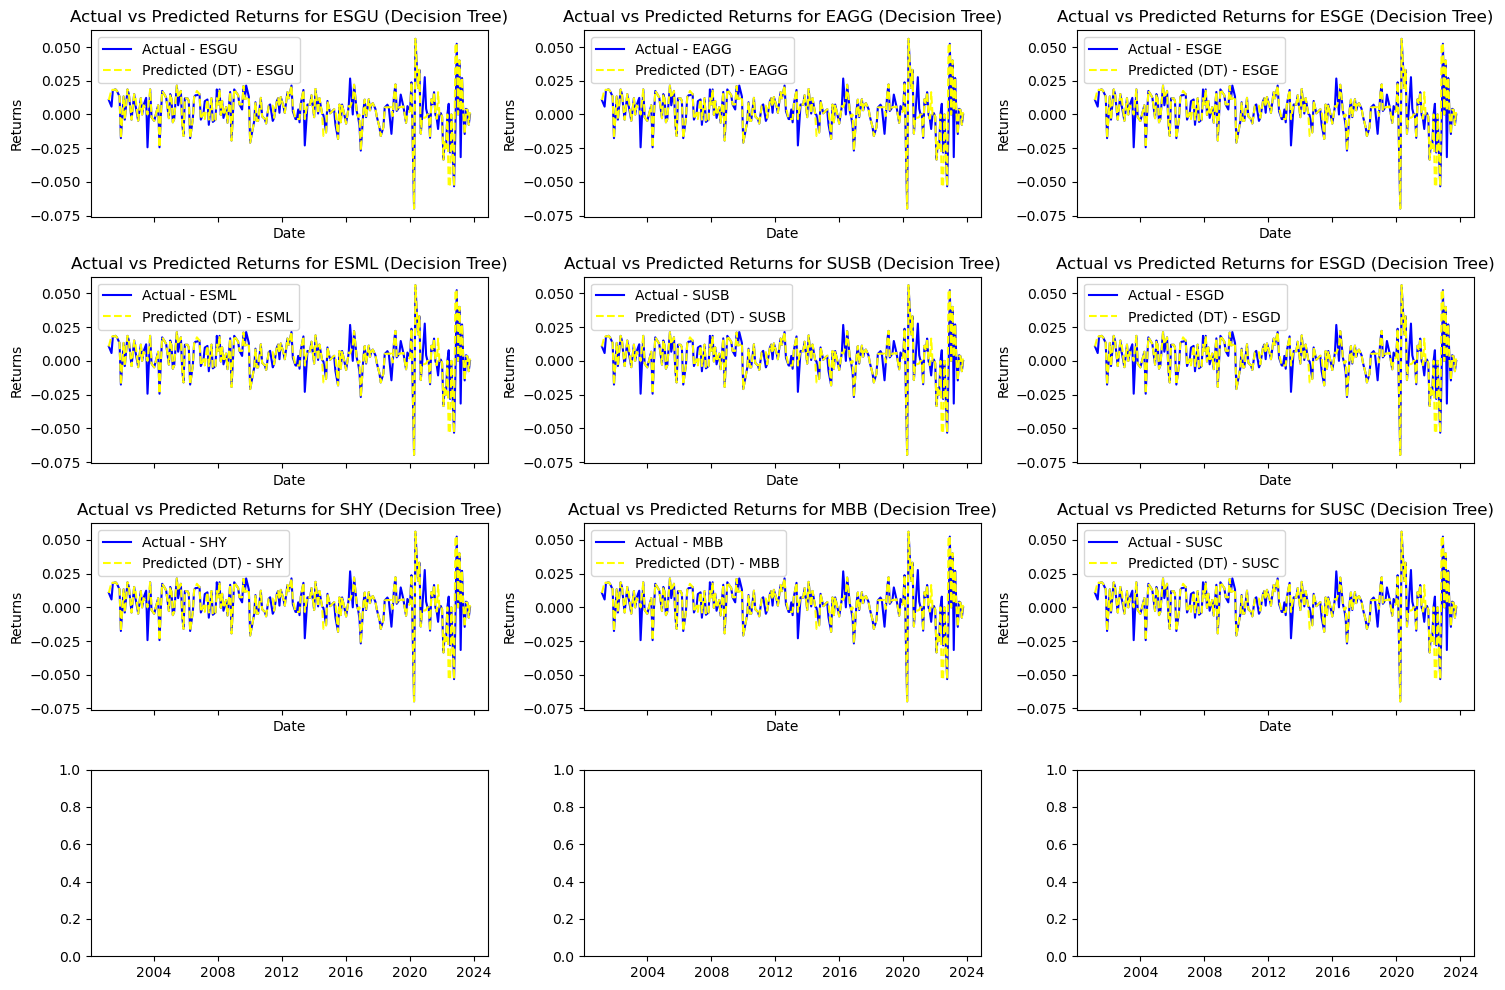


Predicted Returns DataFrame (Decision Tree):
                ESGU      EAGG      ESGE      ESML      SUSB      ESGD  \
2001-02-28  0.010691  0.010691  0.010691  0.010691  0.010691  0.010691   
2001-04-30  0.018594  0.018594  0.018594  0.018594  0.018594  0.018594   
2001-05-31  0.018000  0.018000  0.018000  0.018000  0.018000  0.018000   
2001-07-31  0.018594  0.018594  0.018594  0.018594  0.018594  0.018594   
2001-08-31  0.017473  0.017473  0.017473  0.017473  0.017473  0.017473   
...              ...       ...       ...       ...       ...       ...   
2023-05-31 -0.014471 -0.014471 -0.014471 -0.014471 -0.014471 -0.014471   
2023-06-30  0.003532  0.003532  0.003532  0.003532  0.003532  0.003532   
2023-07-31  0.003532  0.003532  0.003532  0.003532  0.003532  0.003532   
2023-08-31 -0.007614 -0.007614 -0.007614 -0.007614 -0.007614 -0.007614   
2023-09-30  0.003532  0.003532  0.003532  0.003532  0.003532  0.003532   

                 SHY       MBB      SUSC  
2001-02-28  0.010691  

In [17]:
#  Decision Tree 
# Initialize an empty DataFrame to store predicted returns for Decision Tree
predicted_returns_df_dt = pd.DataFrame(index=merged_df.index)

# Create a 4x3 grid for subplots for Decision Tree
fig_dt, axes_dt = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
axes_dt = axes_dt.flatten()

for i, ticker in enumerate(ticker_list_sub):
    # Initialize Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    
    # Lists to store actual and predicted returns for Decision Tree
    actual_returns_list_dt = []
    predicted_returns_list_dt = []
    
    # K-fold cross-validation for Decision Tree
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Model Training for Decision Tree
        dt_model.fit(X_train, y_train)
        
        # Model Prediction for Decision Tree
        y_pred_dt = dt_model.predict(X_test)
        
        # Store actual and predicted returns for Decision Tree
        actual_returns_list_dt. extend(y_test)
        predicted_returns_list_dt.extend(y_pred_dt)
    
    # Predict returns for the entire period using Decision Tree
    predicted_returns_dt = dt_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame for Decision Tree
    predicted_returns_df_dt[ticker] = predicted_returns_dt
    
    # Plot the actual and predicted time series for Decision Tree
    axes_dt[i].plot(merged_df.index, y, label=f'Actual - {ticker}', color='blue')
    axes_dt[i].plot(merged_df.index, predicted_returns_dt, label=f'Predicted (DT) - {ticker}', linestyle='--', color='yellow')
    axes_dt[i].set_title(f'Actual vs Predicted Returns for {ticker} (Decision Tree)')
    axes_dt[i].set_xlabel('Date')
    axes_dt[i].set_ylabel('Returns')
    axes_dt[i].legend()

# Adjust layout for Decision Tree
plt.tight_layout()
plt.show()

# Display the DataFrame with predicted returns for each stock using Decision Tree
print("\nPredicted Returns DataFrame (Decision Tree):")
print(predicted_returns_df_dt)

## Monthly returns predictions 

The following Dataframes containt the monthly return predictions made by the respective machine learning method based on the previous month feature values. 

In [18]:
# Regression Tree predicted Monthly returns for each Index (ETF): 
predicted_returns_df_dt

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,MBB,SUSC
2001-02-28,0.010691,0.010691,0.010691,0.010691,0.010691,0.010691,0.010691,0.010691,0.010691
2001-04-30,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594
2001-05-31,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000,0.018000
2001-07-31,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594,0.018594
2001-08-31,0.017473,0.017473,0.017473,0.017473,0.017473,0.017473,0.017473,0.017473,0.017473
...,...,...,...,...,...,...,...,...,...
2023-05-31,-0.014471,-0.014471,-0.014471,-0.014471,-0.014471,-0.014471,-0.014471,-0.014471,-0.014471
2023-06-30,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532
2023-07-31,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532,0.003532
2023-08-31,-0.007614,-0.007614,-0.007614,-0.007614,-0.007614,-0.007614,-0.007614,-0.007614,-0.007614


In [19]:
# Random forest predicted Monthly returns for each Index (ETF): 
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,MBB,SUSC
2001-02-28,0.016852,0.008945,-0.002733,0.004553,0.004827,0.001728,-0.010146,0.006295,0.010936
2001-04-30,0.012129,0.011997,-0.001058,0.004719,0.005866,0.002375,-0.005669,0.009181,0.011446
2001-05-31,0.028604,0.013173,0.003875,0.027529,0.007222,0.017487,-0.009772,0.007998,0.015195
2001-07-31,-0.005104,0.014675,-0.002782,-0.015350,0.007692,-0.008939,-0.005682,0.013462,0.016366
2001-08-31,0.015544,0.013039,0.020394,0.006190,0.006521,0.004836,-0.009761,0.010341,0.015646
...,...,...,...,...,...,...,...,...,...
2023-05-31,0.009630,-0.006729,0.001971,-0.003207,-0.000470,-0.016807,0.003206,-0.003724,-0.008277
2023-06-30,0.015856,-0.001596,0.016097,0.019368,0.003197,0.007593,-0.000444,0.000220,0.000976
2023-07-31,0.024094,-0.001203,0.038027,0.032955,0.005576,0.017280,0.000418,-0.000454,0.002507
2023-08-31,0.010993,-0.003618,-0.018659,-0.006871,0.002121,-0.011091,0.024048,-0.003347,-0.006840


# Remi's 

In [ ]:
rets

In [ ]:
#Annualized variance of returns
np.sqrt(rets.var()*252)

## Risk parity relaxed optim based on historical rets and cov

Build the linear constraint based on the ESG rating

In [ ]:
import pandas as pd
from riskfolio import factors_constraints

# Your DataFrame
ESG_constraint_data = {
    'ESG Fund Rating': [6.6, 8.6, 7.1, 7.3, 6.5, 5.7, 6, 5.7, 8.2, 7.9, 7.6],
}

ESG_constraint = pd.DataFrame(ESG_constraint_data)

# Define the constraints based on your DataFrame
constraints = pd.DataFrame({
    'Disabled': [False],
    'Factor': ['ESG Fund Rating'],
    'Sign': ['>='],
    'Value': [7],
    'Relative Factor': '',
})

# Create the factors constraints matrices C and D
C, D = factors_constraints(constraints, loadings=ESG_constraint)



In [ ]:
# Building the portfolio object nea== minimal number of assets to include
port = rp.Portfolio(returns=rets,ainequality = C, binequality = D, nea = 6)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector


## Minimum Variance Portfolio

In [ ]:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Minnimum Variance Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_weights = w['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

## Risk Parity Portfolio

In [ ]:
version = 'A' # Could be A, B or C

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b= None, hist=hist)

display(w_rrp_a.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_rrp_a_weights = w_rrp_a['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_rrp_a_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
a1 = rp.Sharpe_Risk(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05)
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')


# Views on Black Litterman Portfolio

In [ ]:
asset_classes = {'Assets':["ESGU", "EAGG", "ESGE", "ESML", "SUSB", "ESGD", "SHY", "SUSA", "GOVT", "MBB", "SUSC"]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Assets', 'Assets', 'Assets'],
         'Set': ['', '', ''],
         'Position': ['SHY', 'ESGE', 'SUSB'],
         'Sign': ['<=', '>=', '>='],
         'Return': [0.08, 0.5, 0], # Annual terms 
         'Type Relative': [ '', '', ''],
         'Relative Set': [ '', '', ''],
         'Relative': ['', '', '']
}

views = pd.DataFrame(views)

display(views)

In [ ]:
P,Q = rp.assets_views(views, asset_classes)

## Black Litterman optimization

In [ ]:
# Estimate Black Litterman inputs:

port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:

model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

w_bl_weights = w_bl['weights'].values.reshape(1, -1)

ESG_Rating_BLportfolio = w_bl_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this BL portfolio is {ESG_Rating_BLportfolio}')               

In [ ]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [ ]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


In [ ]:
# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)